<a href="https://colab.research.google.com/github/Fatai-soliu/Clustering_Algorith-Different-methods-/blob/main/MLDM_Week4_Workshop_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Import and read the Mall_Customers dataset from the drive

data = pd.read_csv("/content/drive/MyDrive/Datasets/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploring the DataFrame

In [ ]:
#Info() to get information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Header is supposed to be Gender not Genre

In [ ]:
data = data.rename(columns = {'Genre' : 'Gender'})

In [ ]:
## data.describe to get like a form of descriptive analysis on this data

data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Normalization and standardization is very important before applying a K-means algorithm

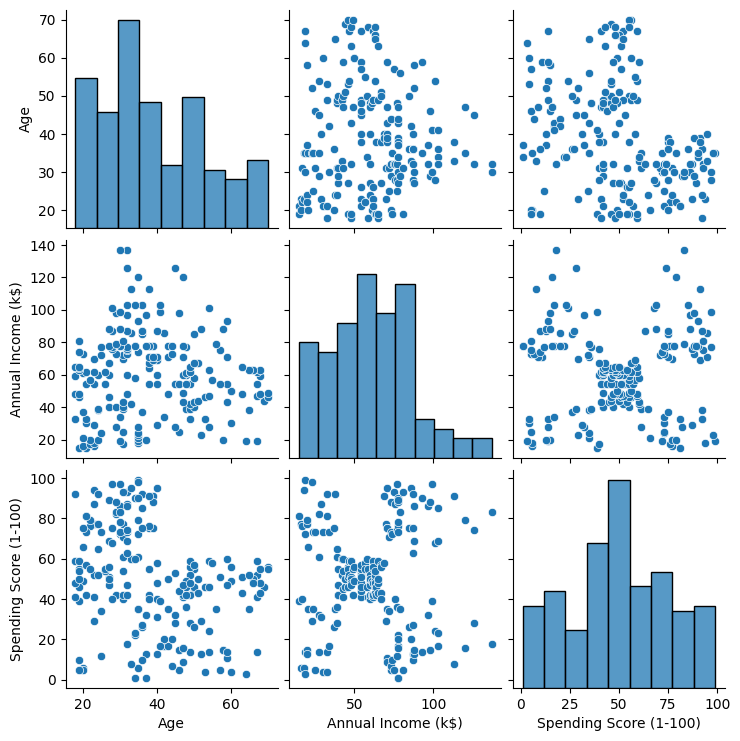

In [ ]:
#Using pairplot is see the relationship among dataset
#This is part of preprocessing stage

sns.pairplot(data.iloc[:,[2,3,4]])

In [ ]:
"""
The task involves working with the "Spending Score" and "Annual Income" features.
Since K-means clustering is being used, the dataset needs to be standardized using Min-Max scaling.
This is necessary to prevent one feature from dominating the other when calculating the Euclidean distance,
ensuring that both features contribute equally to the clustering process.
"""

from sklearn.preprocessing import StandardScaler
X = data.iloc[:,[3,4]]
X_sc = StandardScaler()
X = X_sc.fit_transform(X)

Please Note: We will use elbow method to get optimal number of clusters using K-means
Elbow calculates within cluster sum of squares (wcss)
Aim of K-means is to minimize the value of wcss



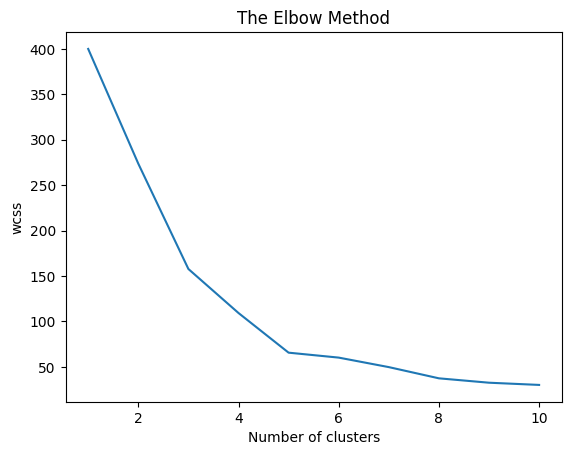

In [ ]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Hence, the optimal number of cluster is 5, because that is the elbow joint

In [ ]:
#This is the actual value of wcss, the append function added the result of the kmeans.fit(X)
wcss

[399.99999999999994,
 273.66888662642003,
 157.70400815035939,
 109.22822707921345,
 65.56840815571681,
 60.132874871934206,
 49.668244837367965,
 37.31912287833882,
 32.495081199100916,
 30.05932269404222]

In [ ]:
## Now, we need to identify the optimal number of clusters on the dataset by using the fit_predict() method
## Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
#What does X and y_kmeans look like
X
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

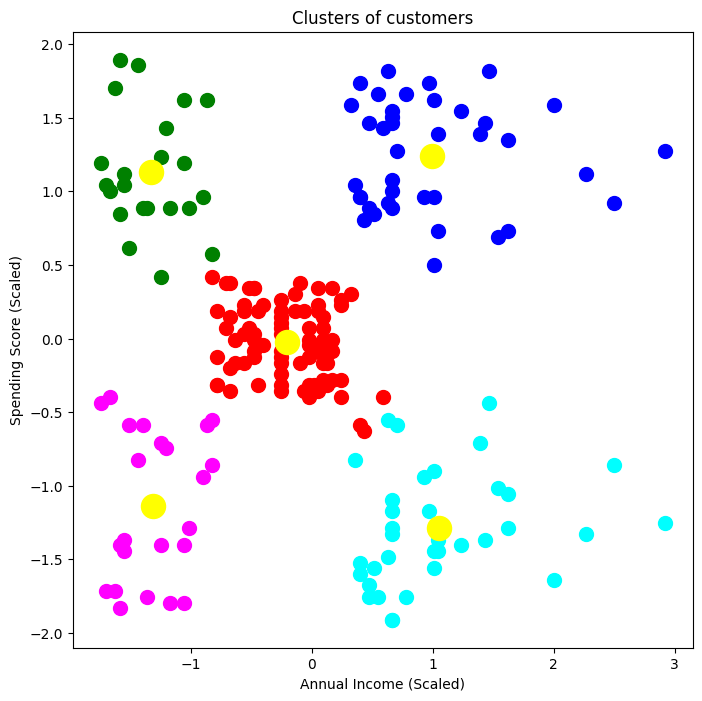

In [ ]:
#The next step is visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

In [ ]:
#This is just to checking the dataframe slicer and understand what the code is doing
X[y_kmeans == 0, 1]

array([ 0.41927286,  0.18634349, -0.12422899, -0.3183368 , -0.3183368 ,
        0.06987881,  0.38045129,  0.14752193,  0.38045129, -0.20187212,
       -0.35715836, -0.00776431, -0.16305055,  0.03105725, -0.16305055,
        0.22516505,  0.18634349,  0.06987881,  0.34162973,  0.03105725,
        0.34162973, -0.00776431, -0.08540743,  0.34162973, -0.12422899,
        0.18634349, -0.3183368 , -0.04658587,  0.22516505, -0.12422899,
        0.14752193,  0.10870037, -0.08540743,  0.06987881, -0.3183368 ,
        0.03105725,  0.18634349, -0.35715836, -0.24069368,  0.26398661,
       -0.16305055,  0.30280817,  0.18634349,  0.38045129, -0.16305055,
        0.18634349, -0.35715836, -0.04658587, -0.39597992, -0.3183368 ,
        0.06987881, -0.12422899, -0.00776431, -0.3183368 , -0.04658587,
       -0.35715836, -0.08540743,  0.34162973,  0.18634349,  0.22516505,
       -0.3183368 , -0.00776431, -0.16305055, -0.27951524, -0.08540743,
        0.06987881,  0.14752193, -0.3183368 , -0.16305055, -0.08

In [ ]:
#This is an extract of one of the scatterplots
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')

#Part Two: Hierarchical Clustering

It also makes use of distance-based clustering method but it starts with one cluster and they merge progressively based on their proximity until only one clusters is left.

A dendogram is best suited to visualise this - with the help of Scipy

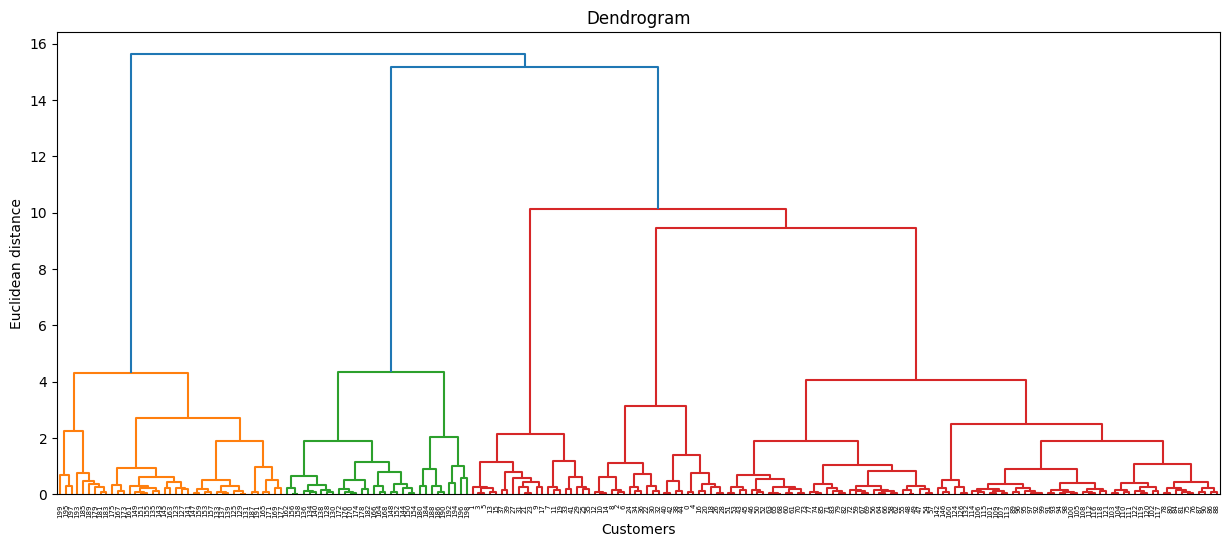

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X, method= 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distance")
plt.show()

In [ ]:
#Now that we have determined the cluster, we can fit (instantiate) the agglomerative clustering object
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

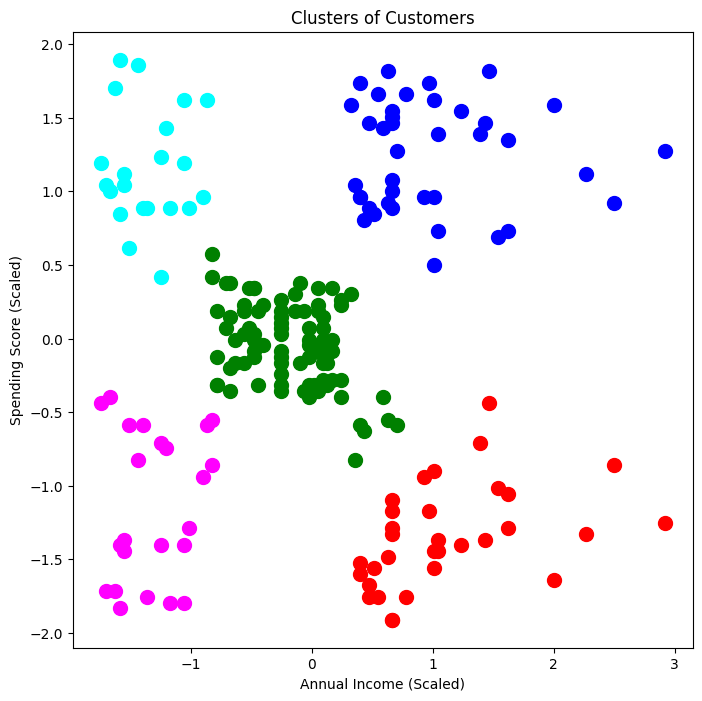

In [ ]:
##Now let's repeat the visualistio of the cluster

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

## Part Three DBSCAN (Density Based Spatial Clustering of Applications with Noise)

Here, Distance will not always be the most appropriate way to assign points
to a cluster.

This uses the density based method

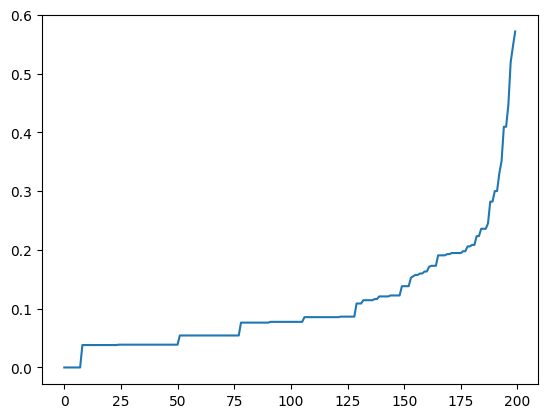

In [ ]:
#Plot the graph to calculate and identify Nearest Neighbours

from sklearn.neighbors import NearestNeighbors

neighbours = NearestNeighbors(n_neighbors=2)
distances, indices = neighbours.fit(X).kneighbors(X)

distances = distances[:, 1]
distances = np.sort(distances, axis = 0)
plt.plot(distances)

distances starts increasing at around 0.25, hence our eps = 0.25

In [ ]:
#Instantiate a DVSCAN object

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.25, min_samples = 5)
y_dbscan = dbscan.fit_predict(X)

In [ ]:
#what does y_dscan and dbscan looks like

dbscan
y_dbscan

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3, -1, -1,  5,  3, -1, -1,
        5, -1,  5,  3,  5,  3,  5, -1,  5,  3, -1,  3,  5,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

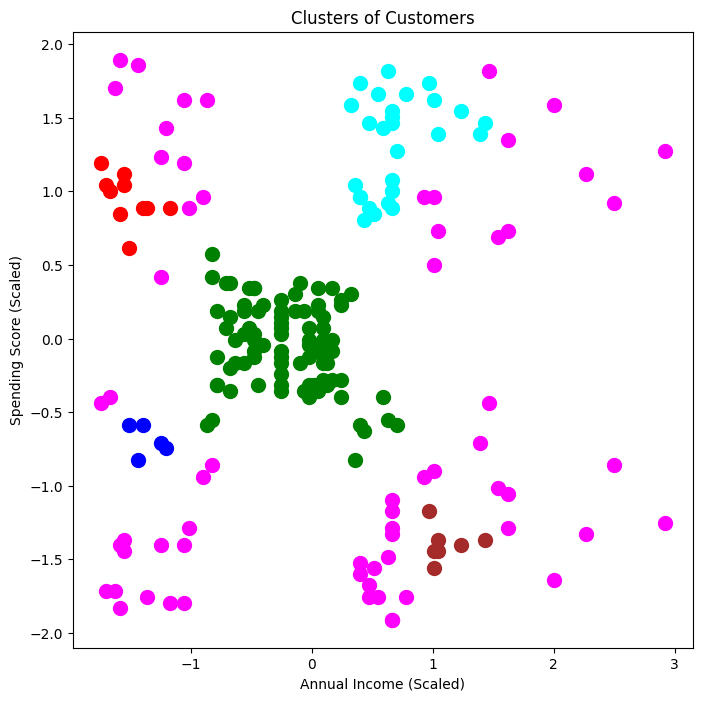

In [ ]:
#Now, let's visualise the clusters like we did before

plt.figure(figsize=(8,8))
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_dbscan == 2, 0], X[y_dbscan == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_dbscan == 3, 0], X[y_dbscan == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_dbscan == 4, 0], X[y_dbscan == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_dbscan == 5, 0], X[y_dbscan == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s = 100, c = 'magenta', label = 'Noise')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

## Part Four: Clustering Data with Higher Dimensionality

This method is to apply similar clustering approach to data with many more features

In [ ]:
#Let's import the company dataset

dataset = pd.read_csv('/content/drive/MyDrive/Datasets/costpercompany.csv')

In [ ]:
#Let's describe and understand the dataset

dataset.head()

,Company,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
0,Yashida,2.70,9.36,222,12.1,12.9,32721,12.3,1.908
1,Wisconsin,1.20,11.80,148,59.9,3.5,7287,41.1,0.702
2,Virginia,1.07,9.30,174,54.3,5.9,10093,26.6,1.306
3,United,1.04,8.60,204,61.0,3.5,6650,0.0,2.116
4,Texas,1.16,11.70,104,54.0,-2.1,13507,0.0,0.636


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       29 non-null     object 
 1   surcharges    29 non-null     float64
 2   RoR           29 non-null     float64
 3   dailycost     29 non-null     int64  
 4   costwithload  29 non-null     float64
 5   costofDemand  29 non-null     float64
 6   Sales         29 non-null     int64  
 7   WearandTear   29 non-null     float64
 8   Fcost         29 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.2+ KB


In [ ]:
dataset.describe()

,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1.402759,10.488966,172.448276,46.862069,4.906897,13024.517241,16.110345,1.173621
std,0.699065,3.564261,60.520709,28.265936,4.572428,9120.761558,18.885356,0.637931
min,0.750000,1.860000,49.000000,-49.800000,-2.200000,3300.000000,0.000000,-0.012000
25%,1.050000,9.200000,148.000000,51.500000,2.200000,6650.000000,0.000000,0.636000
50%,1.150000,10.580000,173.000000,56.000000,3.500000,9673.000000,8.300000,1.108000
75%,1.430000,12.200000,199.000000,60.000000,7.200000,15651.000000,26.700000,1.652000
max,3.900000,21.160000,370.000000,72.000000,16.400000,40008.000000,53.400000,2.610000


In [ ]:
#Visualising the numerical part of the dataset

X = dataset.iloc[:,1:9]

In [ ]:
X.head()

,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
0,2.70,9.36,222,12.1,12.9,32721,12.3,1.908
1,1.20,11.80,148,59.9,3.5,7287,41.1,0.702
2,1.07,9.30,174,54.3,5.9,10093,26.6,1.306
3,1.04,8.60,204,61.0,3.5,6650,0.0,2.116
4,1.16,11.70,104,54.0,-2.1,13507,0.0,0.636


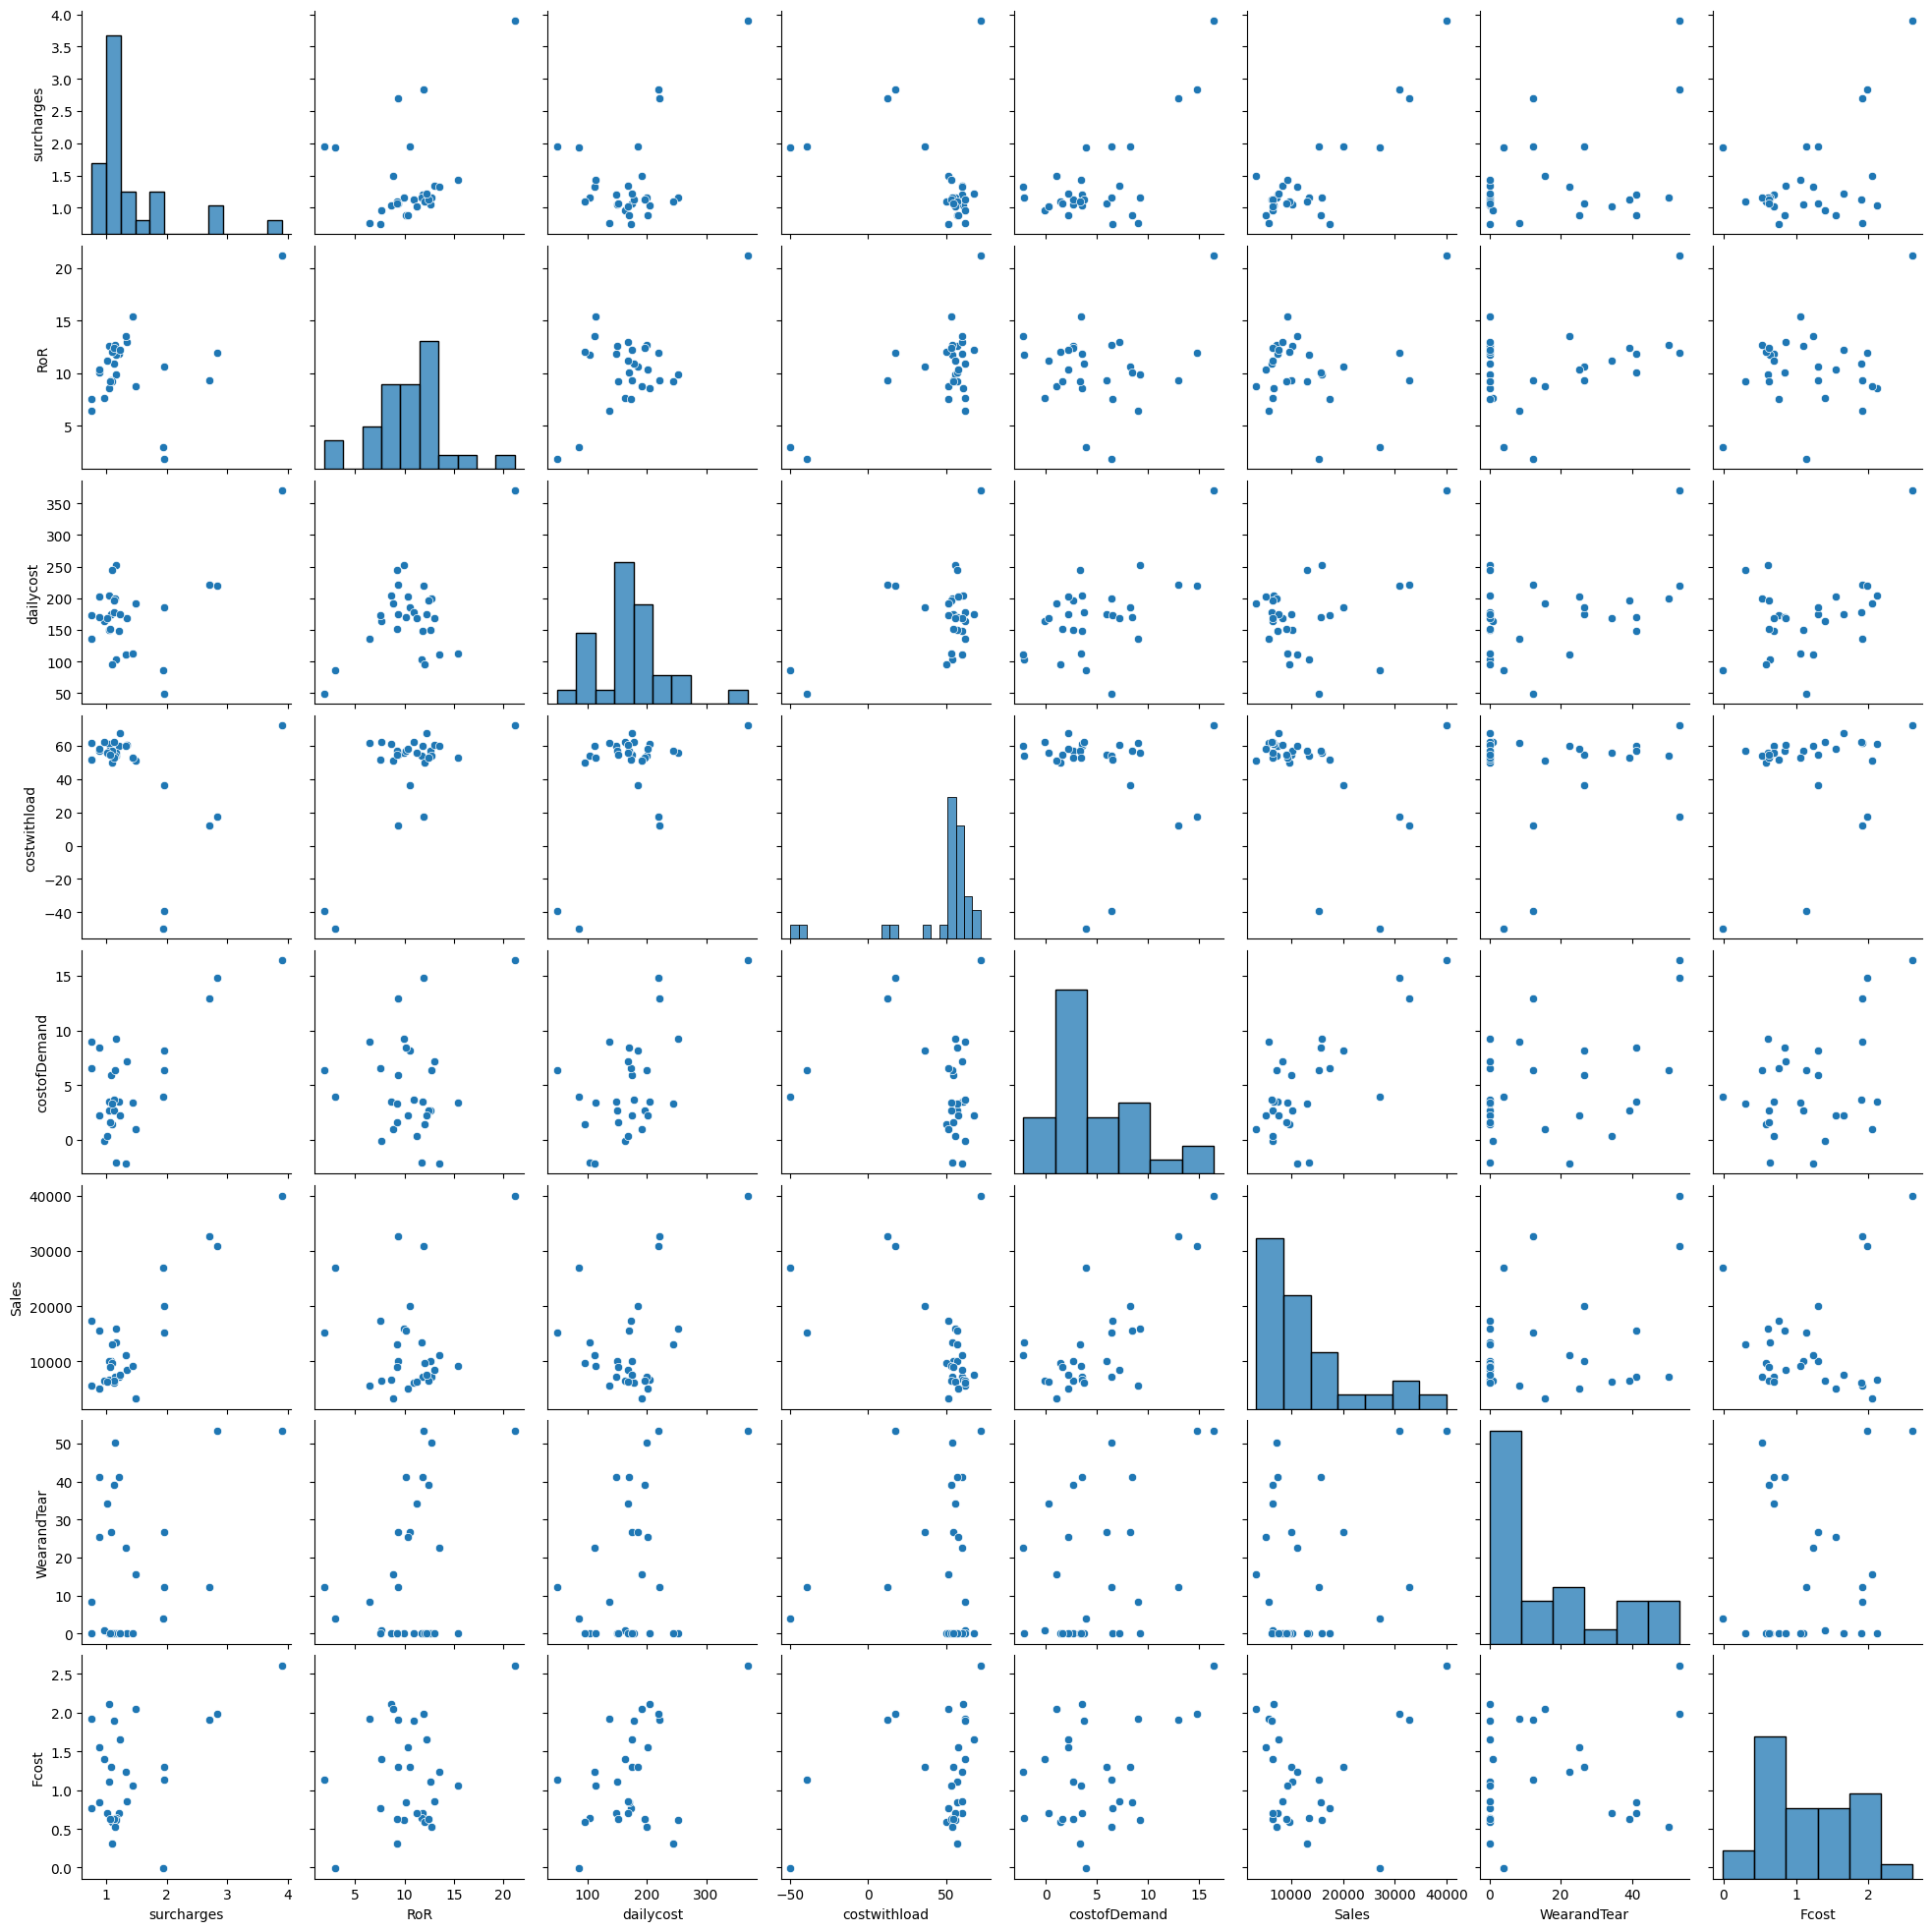

In [ ]:
sns.pairplot(X)

In [ ]:
## Standardize the data

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

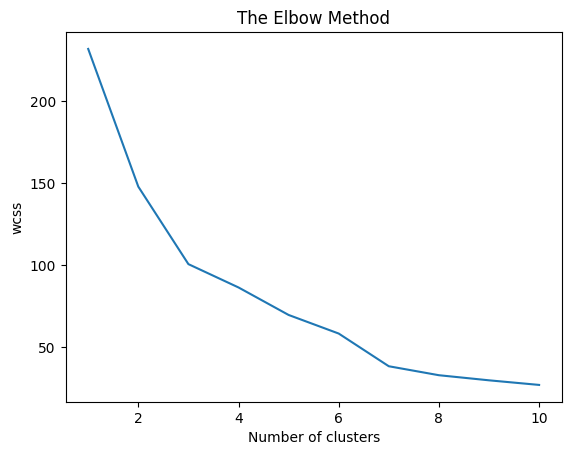

In [ ]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Selecting k=3

In [ ]:
#Let's fit the K-Means to the dataset and then plot the scatter plot

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 2], dtype=int32)

In [ ]:
## We need to reduce the dimensionality before we can visualise

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.44839294, 0.25725108])

In [ ]:
sum(pca.explained_variance_ratio_)

0.7056440181560043

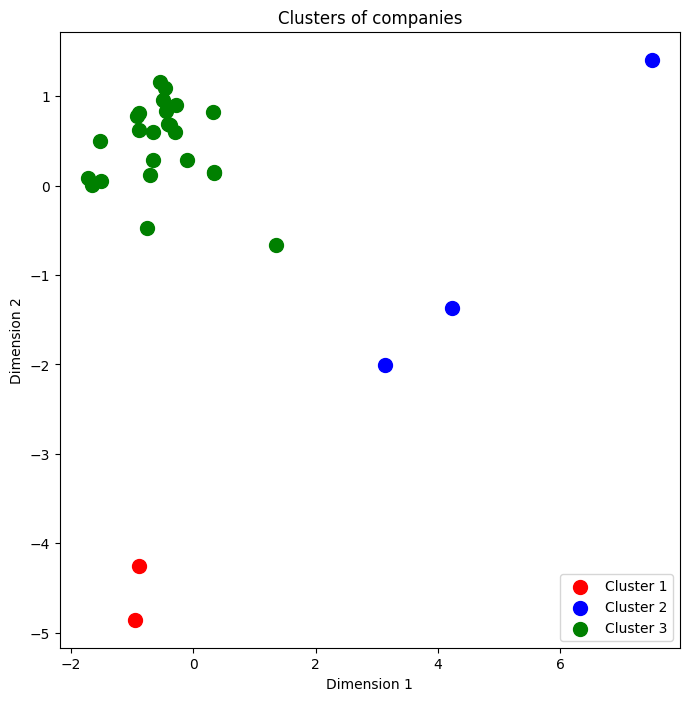

In [ ]:
#Visualising the clusters

colours = ['red', 'blue', 'green']

plt.figure(figsize=(8,8))
for i in range(3):
  plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1],
              s = 100, c= colours[i], label = 'Cluster '+str(i+1))
plt.title('Clusters of companies')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()